# Imports

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

# Reading data

In [61]:
train_data = pd.read_csv('application_train.csv')
test_data = pd.read_csv('application_test.csv')

# Exploratory Data Analysis

## Checking how train data looks like

In [62]:
pd.set_option('display.max_columns', 125)
print(train_data.shape)
train_data.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [63]:
print("Data types of features:")
train_data.dtypes.value_counts()

Data types of features:


float64    65
int64      41
object     16
dtype: int64

## Checking how test data looks like

In [64]:
print(test_data.shape)
test_data.head()

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

## Checking distribution of targets in training data

In [65]:
print("Targets values and sums: \n{}".format(train_data['TARGET'].value_counts()))

Targets values and sums: 
0    282686
1     24825
Name: TARGET, dtype: int64


Text(0,0.5,'No. of Occurences')

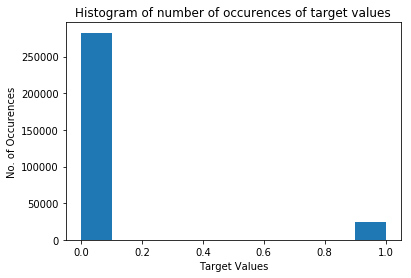

In [66]:
plt.hist(train_data['TARGET'])
plt.title("Histogram of number of occurences of target values")
plt.xlabel("Target Values")
plt.ylabel("No. of Occurences")

## Missing Data In Training Dataset

In [67]:
missing_values_count = train_data.isnull().sum()
train_data_total_cells = np.product(train_data.shape)

In [68]:
missing_values_count.sort_values(ascending=False, inplace=True)
total_amount_of_missing_data = missing_values_count.sum() / train_data_total_cells * 100
print("Total amount of missing data in training set: {}%".format(total_amount_of_missing_data))
missing_values_count = missing_values_count[missing_values_count !=0]

Total amount of missing data in training set: 24.39594190712943%


### Calculate percentage of missing data for such features

In [69]:
no_of_rows = train_data.shape[0]
missing_values_count_percent = pd.Series(data = (val / no_of_rows * 100 for val in missing_values_count),
                                         index = missing_values_count.keys())

missing_values_table = pd.concat([missing_values_count, missing_values_count_percent], axis = 1)
missing_values_table = missing_values_table.rename(columns = {0 : 'missing values',
                                       1 : '% of rows values'})
print("There is {} features with missing values".format(missing_values_table.shape[0]))
print("30 features with biggest number of missing values:")
missing_values_table.head(30)

There is 67 features with missing values
30 features with biggest number of missing values:


,missing values,% of rows values
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


It looks like most of the features, with biggest number of missing values, are related to information about place where candidate for loan currently lives. Feature EXT_SOURCE_1 is normalized score from external data source and more than 50% of the data is missing. OWN_CAR_AGE has almost 66% of missing data. It needs to be checked with FLAG_OWN_CAR feature if data is missing because candidate doesn't have car or information about car's age wasn't provided.

### Normalize features
Features: DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE have negative values since they are measured against time of application. They need to be represented in positive value and features DAYS_BIRTH and DAYS_EMPLOYED should be rescaled to years.


In [70]:
# normalization of DAYS_BIRTH feature
train_data['DAYS_BIRTH'] = train_data['DAYS_BIRTH'] / -365
train_data.rename(columns={'DAYS_BIRTH': 'AGE'}, inplace=True)
# changing features to positive values
train_data['DAYS_REGISTRATION'] = train_data['DAYS_REGISTRATION'] * -1
train_data['DAYS_ID_PUBLISH'] = train_data['DAYS_ID_PUBLISH'] * -1
train_data['DAYS_LAST_PHONE_CHANGE'] = train_data['DAYS_LAST_PHONE_CHANGE'] * -1

In [71]:
# same transformation has to be applied to test set
test_data['DAYS_BIRTH'] = test_data['DAYS_BIRTH'] / -365
test_data.rename(columns={'DAYS_BIRTH': 'AGE'}, inplace=True)
test_data['DAYS_REGISTRATION'] = test_data['DAYS_REGISTRATION'] * -1
test_data['DAYS_ID_PUBLISH'] = test_data['DAYS_ID_PUBLISH'] * -1
test_data['DAYS_LAST_PHONE_CHANGE'] = test_data['DAYS_LAST_PHONE_CHANGE'] * -1

During normalization process outliners were found in DAYS_EMPLOYED feature

In [72]:
train_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Mean value is 63815 even though that all values should be negative. It means that some high, positive values occur, that could be outliners.

In [73]:
train_data['DAYS_EMPLOYED'].value_counts()[:10]

 365243    55374
-200         156
-224         152
-199         151
-230         151
-212         150
-229         143
-384         143
-231         140
-215         138
Name: DAYS_EMPLOYED, dtype: int64

Value 365243 occurs 55374 times. It would mean that 55374 people, who applied for loan, have been working in their last job for over 1000 years.
To remove this outliners new feature called `EMPLOYED_ANOM` is going to be created. In column `DAYS_EMPLOYED` value 365243 is going to be replaced with 0 and then whole feature will be rescaled to years and renamed to `YEARS_EMPLOYED`.

In [74]:
train_data['EMPLOYED_ANOM'] = train_data['DAYS_EMPLOYED'] == 365243
train_data['DAYS_EMPLOYED'].replace({365243: 0}, inplace=True)
train_data['DAYS_EMPLOYED'] = train_data['DAYS_EMPLOYED'] / -365
train_data.rename(columns={'DAYS_EMPLOYED': 'YEARS_EMPLOYED'}, inplace=True)

Same procedure has to be done to test set.

In [75]:
test_data['EMPLOYED_ANOM'] = test_data['DAYS_EMPLOYED'] == 365243
test_data['DAYS_EMPLOYED'].replace({365243: 0}, inplace=True)
test_data['DAYS_EMPLOYED'] = test_data['DAYS_EMPLOYED'] / -365
test_data.rename(columns={'DAYS_EMPLOYED': 'YEARS_EMPLOYED'}, inplace=True)

In [76]:
train_data['YEARS_EMPLOYED'].describe()

count    307511.000000
mean          5.355748
std           6.320737
min          -0.000000
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64

Checking correlation of features with "TARGET" before one-hot encoding categorical variables.

In [77]:
%%time
pearson_corr = train_data.corr()

Wall time: 27.2 s


In [78]:
pearson_corr_to_target = pearson_corr["TARGET"].sort_values(ascending=False)
display(pearson_corr_to_target.head(20))
display(pearson_corr_to_target.tail(20))

TARGET                         1.000000
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
Name: TARGET, dtype: float64

LIVINGAREA_MEDI              -0.032739
LIVINGAREA_AVG               -0.032997
FLOORSMIN_MEDI               -0.033394
FLOORSMIN_AVG                -0.033614
ELEVATORS_MEDI               -0.033863
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
DAYS_REGISTRATION            -0.041975
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
EMPLOYED_ANOM                -0.045987
YEARS_EMPLOYED               -0.046052
DAYS_ID_PUBLISH              -0.051457
DAYS_LAST_PHONE_CHANGE       -0.055218
AGE                          -0.078239
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64

### Encode categorical variables

In [79]:
print("There is {} categorical features".format(train_data.select_dtypes(include=[object]).shape[1]))

There is 16 categorical features


In [80]:
display(train_data.select_dtypes(include=[object]))

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
5,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Other,NaN,NaN,NaN,NaN
6,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Accountants,SUNDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
7,Cash loans,M,Y,Y,Unaccompanied,State servant,Higher education,Married,House / apartment,Managers,MONDAY,Other,NaN,NaN,NaN,NaN
8,Cash loans,F,N,Y,Children,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,XNA,NaN,NaN,NaN,NaN
9,Revolving loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,THURSDAY,Electricity,NaN,NaN,NaN,NaN


Some of the categorical features have only two values so it seems reasonable to transform them into binary format instead of one-hot encoding.

In [81]:
bin_features_list = ["FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CODE_GENDER"]
label_encoder = LabelEncoder()
for feature in bin_features_list:
    label_encoder.fit(train_data[feature])
    train_data[feature] = label_encoder.transform(train_data[feature])
    test_data[feature] = label_encoder.transform(test_data[feature])

There is one more feature - EMERGENCYSTATE_MODE, that has only two values but currently it can't be transformed using LabelEncoder because it has missing values which need to be handled first.

In [82]:
# Data analysis of feature EMERGENCYSTATE_MODE
print("Number of values: {}".format(train_data["EMERGENCYSTATE_MODE"].value_counts().sum()))
print("Numbe of missing values: {}".format(train_data["EMERGENCYSTATE_MODE"].isnull().sum()))
print("Counts: Yes - {}, No - {}".format(train_data["EMERGENCYSTATE_MODE"].value_counts()[1],
                                         train_data["EMERGENCYSTATE_MODE"].value_counts()[0]))

Number of values: 161756
Numbe of missing values: 145755
Counts: Yes - 2328, No - 159428


According to description of features, EMERGENCYSTATE_MODE is related to some parameter of house that client currently lives in. If we take into account that features with most number of missing values belong to same group it doesn't make sense to imput missing value. It will be better to one-hot encode those features as they are and treat missing values as another category.

In [83]:
display(train_data.select_dtypes(include=[object]))

,NAME_CONTRACT_TYPE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
5,Cash loans,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Other,NaN,NaN,NaN,NaN
6,Cash loans,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Accountants,SUNDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
7,Cash loans,Unaccompanied,State servant,Higher education,Married,House / apartment,Managers,MONDAY,Other,NaN,NaN,NaN,NaN
8,Cash loans,Children,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,XNA,NaN,NaN,NaN,NaN
9,Revolving loans,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,THURSDAY,Electricity,NaN,NaN,NaN,NaN


In [84]:
def encode_categorical_features(data_to_encode):
    categorical_features = data_to_encode.select_dtypes(include=[object]).columns.values.tolist()
    for categorical_feature in categorical_features:
        print("One hot encoding feature {}".format(categorical_feature))
        encoded_data = pd.get_dummies(data_to_encode[categorical_feature], prefix=categorical_feature, dummy_na=True)
        data_to_encode = pd.concat([data_to_encode, encoded_data], axis=1)
        data_to_encode.drop(categorical_feature, axis=1, inplace=True)
    return data_to_encode

In [85]:
print("No of features in test set before encoding: {}".format(train_data.shape[1]))
train_data = encode_categorical_features(train_data)
print("No of features in test set after encoding: {}".format(train_data.shape[1]))

No of features in test set before encoding: 123
One hot encoding feature NAME_CONTRACT_TYPE
One hot encoding feature NAME_TYPE_SUITE
One hot encoding feature NAME_INCOME_TYPE
One hot encoding feature NAME_EDUCATION_TYPE
One hot encoding feature NAME_FAMILY_STATUS
One hot encoding feature NAME_HOUSING_TYPE
One hot encoding feature OCCUPATION_TYPE
One hot encoding feature WEEKDAY_APPR_PROCESS_START
One hot encoding feature ORGANIZATION_TYPE
One hot encoding feature FONDKAPREMONT_MODE
One hot encoding feature HOUSETYPE_MODE
One hot encoding feature WALLSMATERIAL_MODE
One hot encoding feature EMERGENCYSTATE_MODE
No of features in test set after encoding: 256


Same procedure has to be applied to testing set.

In [86]:
print("No of features in test set before encoding: {}".format(test_data.shape[1]))
test_data = encode_categorical_features(test_data)
print("No of features in test set after encoding: {}".format(test_data.shape[1]))

No of features in test set before encoding: 122
One hot encoding feature NAME_CONTRACT_TYPE
One hot encoding feature NAME_TYPE_SUITE
One hot encoding feature NAME_INCOME_TYPE
One hot encoding feature NAME_EDUCATION_TYPE
One hot encoding feature NAME_FAMILY_STATUS
One hot encoding feature NAME_HOUSING_TYPE
One hot encoding feature OCCUPATION_TYPE
One hot encoding feature WEEKDAY_APPR_PROCESS_START
One hot encoding feature ORGANIZATION_TYPE
One hot encoding feature FONDKAPREMONT_MODE
One hot encoding feature HOUSETYPE_MODE
One hot encoding feature WALLSMATERIAL_MODE
One hot encoding feature EMERGENCYSTATE_MODE
No of features in test set after encoding: 253


After encoding of both train and test set there is difference in number of features.

### Aligment of test and train data

In [87]:
train_labels = train_data["TARGET"]
train_data, test_data = train_data.align(test_data, join="inner", axis=1)
print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)

Train data shape:  (307511, 253)
Test data shape:  (48744, 253)


### Handling of missing data

After encoding of categorical variables it needs to be checked how many entries with missing values is left.
During encoding, in some features, missing values were treated as another category, so it's expected that there will be smaller number of missing values.

In [88]:
missing_values_count = train_data.isnull().sum()
train_data_total_cells = np.product(train_data.shape)

In [89]:
missing_values_count.sort_values(ascending=False, inplace=True)
total_amount_of_missing_data = missing_values_count.sum() / train_data_total_cells * 100
print("Total amount of missing data in training set: {}%".format(total_amount_of_missing_data))
missing_values_count = missing_values_count[missing_values_count !=0]

Total amount of missing data in training set: 10.781572606875994%


In comparison to first check percentage of missing values dropped from 24.39% to 10.78%

In [90]:
no_of_rows = train_data.shape[0]
missing_values_count_percent = pd.Series(data = (val / no_of_rows * 100 for val in missing_values_count),
                                         index = missing_values_count.keys())

missing_values_table = pd.concat([missing_values_count, missing_values_count_percent], axis = 1)
missing_values_table = missing_values_table.rename(columns = {0 : 'missing values',
                                       1 : '% of rows values'})
print("There is {} features with missing values".format(missing_values_table.shape[0]))
print("10 features with biggest number of missing values:")
missing_values_table.head(10)

There is 61 features with missing values
10 features with biggest number of missing values:


,missing values,% of rows values
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
FLOORSMIN_MODE,208642,67.848630


Features with biggest percentage of missing values are related to building's condition in which client currently lives. For Logistic Regression and Random Forrest model those values have to be filled in. XGBoost can handle missing values. Imputation will be done just before training models, so that exploratory data analysis won't be influenced by imputed values.

### Correlations

In [91]:
# to check correlation of features with target I have to add "TARGET" column to data set
train_data["TARGET"] = train_labels

In [92]:
%%time
pearson_corr = train_data.corr()

Wall time: 1min 48s


In [94]:
display(pearson_corr)

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,...,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,ORGANIZATION_TYPE_nan,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_nan,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_nan,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,TARGET
SK_ID_CURR,1.000000,-0.000769,0.001216,0.000703,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,0.001500,-0.000473,0.000973,0.000384,0.001818,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.002895,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.000082,0.002342,0.000222,0.001556,-0.002070,0.001551,0.005900,-0.001463,0.004862,-0.002879,0.004851,0.003083,0.001465,0.003119,0.001770,-0.002575,0.003042,0.001961,-0.001411,0.001890,0.005245,-0.001058,0.005017,-0.002844,0.004386,0.002081,0.001548,0.003589,0.002156,-0.001923,0.001920,...,-0.001215,0.000331,-0.001259,-0.001807,-0.000229,0.000462,-0.000351,-0.004079,0.001744,0.002351,-0.000336,-0.000192,-0.000872,-0.002008,-0.001676,-0.000009,0.001172,-0.003488,0.001141,0.000143,0.000115,-0.001418,-0.002631,-0.003140,0.002820,-0.003127,-0.001047,-0.002770,-0.000435,0.002994,0.002342,-0.000148,4.081621e-04,0.003103,-0.000891,-0.002568,-0.000669,0.002658,-0.000496,0.001368,NaN,0.000430,0.000590,-0.000892,0.000749,0.000212,0.001254,0.001344,0.000553,-0.001510,0.002073,-0.000976,0.000072,

In [93]:
pearson_corr_to_target = pearson_corr["TARGET"].sort_values(ascending=False)
display(pearson_corr_to_target.head(20))
display(pearson_corr_to_target.tail(20))

TARGET                                               1.000000
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
CODE_GENDER                                          0.054692
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
FLAG_EMP_PHONE                                       0.045982
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_DOCUMENT_3                                      0.044346
OCCUPATION_TYPE_Laborers                             0.043019
EMERGENCYSTATE_MODE_nan                              0.041392
HOUSETYPE_MODE_nan                                   0.039722
WALLSMATERIAL_MODE_nan                               0.039393
OWN_CAR_AGE                                          0.037612
LIVE_CITY_NOT_WORK_CITY                              0.032518
DEF_30_C

FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_AVG                          -0.044003
ORGANIZATION_TYPE_XNA                  -0.045987
EMPLOYED_ANOM                          -0.045987
YEARS_EMPLOYED                         -0.046052
NAME_INCOME_TYPE_Pensioner             -0.046209
DAYS_ID_PUBLISH                        -0.051457
DAYS_LAST_PHONE_CHANGE                 -0.055218
NAME_EDUCATION_TYPE_Higher education   -0.056593
AGE                                    -0.078239
EXT_SOURCE_1                           -0.155317
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_3                           -0.178919
NAME_CONTRACT_TYPE_nan                       NaN
NAME_INCOME_TYPE_nan                         NaN
NAME_EDUCATION_TYPE_nan                      NaN
NAME_FAMILY_STATUS_nan                       NaN
NAME_HOUSING_TYPE_nan                        NaN
WEEKDAY_APPR_PROCESS_START_nan               NaN
ORGANIZATION_TYPE_nan                        NaN
Name: TARGET, dtype: